In [118]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
plt.style.use('ggplot')
pd.set_option('display.max_columns', None)


In [4]:
df = pd.read_csv('ChargePoint Data CY20Q4.csv', dtype={'Station Name': str}, parse_dates=['End Date', 'Start Date'], low_memory=False)
df = df.drop(["Org Name", "Country", "Start Time Zone", "End Time Zone"], axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 259415 entries, 0 to 259414
Data columns (total 29 columns):
 #   Column                           Non-Null Count   Dtype         
---  ------                           --------------   -----         
 0   Station Name                     259415 non-null  object        
 1   MAC Address                      259415 non-null  object        
 2   Start Date                       259415 non-null  datetime64[ns]
 3   End Date                         259415 non-null  object        
 4   Transaction Date (Pacific Time)  259206 non-null  object        
 5   Total Duration (hh:mm:ss)        259415 non-null  object        
 6   Charging Time (hh:mm:ss)         259415 non-null  object        
 7   Energy (kWh)                     259415 non-null  float64       
 8   GHG Savings (kg)                 259415 non-null  float64       
 9   Gasoline Savings (gallons)       259415 non-null  float64       
 10  Port Type                        259406 non-

In [63]:
df.head(5)

,Station Name,MAC Address,Start Date,End Date,Transaction Date (Pacific Time),Total Duration (hh:mm:ss),Charging Time (hh:mm:ss),Energy (kWh),GHG Savings (kg),Gasoline Savings (gallons),Port Type,Port Number,Plug Type,EVSE ID,Address 1,City,State/Province,Postal Code,Latitude,Longitude,Currency,Fee,Ended By,Plug In Event Id,Driver Postal Code,User ID,County,System S/N,Model Number,Hub
0,PALO ALTO CA / HAMILTON #1,000D:6F00:015A:9D76,2011-07-29 20:17:00,7/29/2011 23:20,7/29/2011 23:20,3:03:32,1:54:03,6.249457,2.625,0.784,Level 2,2,J1772,NaN,250 Hamilton Ave,Palo Alto,California,94301,37.444572,-122.160309,USD,0.0,Plug Out at Vehicle,3,95124.0,3284,NaN,NaN,NaN,HAMILTON
1,PALO ALTO CA / HAMILTON #1,000D:6F00:015A:9D76,2011-07-30 00:00:00,7/30/2011 0:02,7/30/2011 0:02,0:02:06,0:01:54,0.106588,0.045,0.013,Level 2,2,J1772,NaN,250 Hamilton Ave,Palo Alto,California,94301,37.444572,-122.160309,USD,0.0,Customer,4,94301.0,4169,NaN,NaN,NaN,HAMILTON
2,PALO ALTO CA / HAMILTON #1,000D:6F00:015A:9D76,2011-07-30 08:16:00,7/30/2011 12:34,7/30/2011 12:34,4:17:32,4:17:28,14.951777,6.280,1.876,Level 2,2,J1772,NaN,250 Hamilton Ave,Palo Alto,California,94301,37.444572,-122.160309,USD,0.0,Plug Out at Vehicle,5,94301.0,4169,NaN,NaN,NaN,HAMILTON
3,PALO ALTO CA / HAMILTON #1,000D:6F00:015A:9D76,2011-07-30 14:51:00,7/30/2011 16:55,7/30/2011 16:55,2:03:24,2:02:58,7.159643,3.007,0.899,Level 2,2,J1772,NaN,250 Hamilton Ave,Palo Alto,California,94301,37.444572,-122.160309,USD,0.0,Customer,6,94302.0,2545,NaN,NaN,NaN,HAMILTON
4,PALO ALTO CA / HAMILTON #1,000D:6F00:015A:9D76,2011-07-30 18:51:00,7/30/2011 20:03,7/30/2011 20:03,1:11:24,0:43:54,1.957765,0.822,0.246,Level 2,2,J1772,NaN,250 Hamilton Ave,Palo Alto,California,94301,37.444572,-122.160309,USD,0.0,Plug Out at Vehicle,7,94043.0,3765,NaN,NaN,NaN,HAMILTON


In [163]:
def create_hub_name(station):
   hub_name = station.rsplit('/', 1)[1].lstrip().rsplit(' ', 1)[0]
   if hub_name == 'BRYANT #':
      return 'BRYANT'
   else: 
      return hub_name

def count_plugs(station):
   no_plugs = len(df['Port Number'].loc[df['Station Name'] == station].unique())
   return no_plugs
   '''if 'SHERMAN' in station:
      return 2
   else: 
      return no_plugs'''

In [164]:
df['Hub'] = df['Station Name'].apply(create_hub_name)
df['No. Plugs'] = df['Station Name'].apply(count_plugs)

KeyboardInterrupt: 

<AxesSubplot:title={'center':'Total plugin events pr. hub'}, xlabel='Hub'>

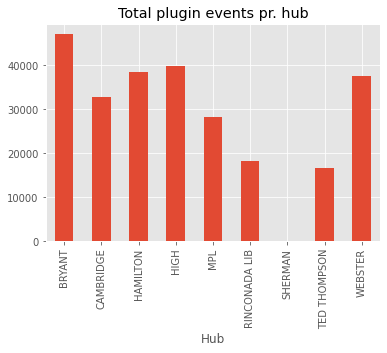

In [51]:
df.groupby('Hub')['Plug In Event Id'].count().plot.bar(title = 'Total plugin events pr. hub')

In [72]:
## Get number of charging plugs pr. station (#stations + #plugs) 
for i in df['Station Name'].unique():
    print(i)
    print(df['Port Number'].loc[df['Station Name'] == i].unique())


PALO ALTO CA / HAMILTON #1
[2 1]
PALO ALTO CA / HAMILTON #2
[2 1]
PALO ALTO CA / HIGH #4
[2 1]
PALO ALTO CA / BRYANT #2
[2 1]
PALO ALTO CA / BRYANT #1
[2 1]
PALO ALTO CA / MPL #4
[1]
PALO ALTO CA / MPL #6
[1]
PALO ALTO CA / MPL #2
[1]
PALO ALTO CA / MPL #1
[1]
PALO ALTO CA / MPL #5
[1]
PALO ALTO CA / MPL #3
[1]
PALO ALTO CA / RINCONADA LIB 2
[2 1]
PALO ALTO CA / RINCONADA LIB 1
[2 1]
PALO ALTO CA / RINCONADA LIB 3
[2 1]
PALO ALTO CA / WEBSTER #1
[2 1]
PALO ALTO CA / HIGH #1
[2 1]
PALO ALTO CA / WEBSTER #2
[2 1]
PALO ALTO CA / TED THOMPSON #1
[2 1]
PALO ALTO CA / CAMBRIDGE #1
[2 1]
PALO ALTO CA / BRYANT #3
[2 1]
PALO ALTO CA / WEBSTER #3
[2 1]
PALO ALTO CA / CAMBRIDGE #2
[2 1]
PALO ALTO CA / HIGH #2
[2 1]
PALO ALTO CA / HIGH #3
[2 1]
PALO ALTO CA / BRYANT #6
[1 2]
PALO ALTO CA / BRYANT #4
[1 2]
PALO ALTO CA / BRYANT #5
[1 2]
PALO ALTO CA / TED THOMPSON #4
[2 1]
PALO ALTO CA / TED THOMPSON #3
[2 1]
PALO ALTO CA / CAMBRIDGE #5
[1 2]
PALO ALTO CA / TED THOMPSON #2
[1 2]
PALO ALTO CA / CAMB

In [152]:
list_of_first_records = []
for i in df['Station Name'].unique():
    list_of_first_records.append(df[df['Station Name'] == i].iloc[0].values)

df_charging_stations = pd.DataFrame(list_of_first_records)
df_charging_stations = df_charging_stations.set_axis(df.columns.unique().values, axis=1, inplace=False)

In [153]:
## Count no. of charging stations pr. hub over time
df_charging_stations['No. Stations'] = df_charging_stations.groupby('Hub').cumcount()
df_charging_stations['No. Stations'] = df_charging_stations['No. Stations'] + 1
df_charging_stations_per_hub = df_charging_stations[['Station Name', 'Start Date', 'Port Number', 'Hub', 'No. Stations']]

In [155]:
## Create df with time and hubs as rows and columns respectively. Filled with number of charging stations
df_stations = df_charging_stations_per_hub.pivot_table(values='No. Stations', index=['Start Date'], columns='Hub', aggfunc='first')
df_stations = df_stations.fillna(0)
df_stations = df_stations.replace(to_replace=0, method='ffill')

<AxesSubplot:xlabel='Start Date'>

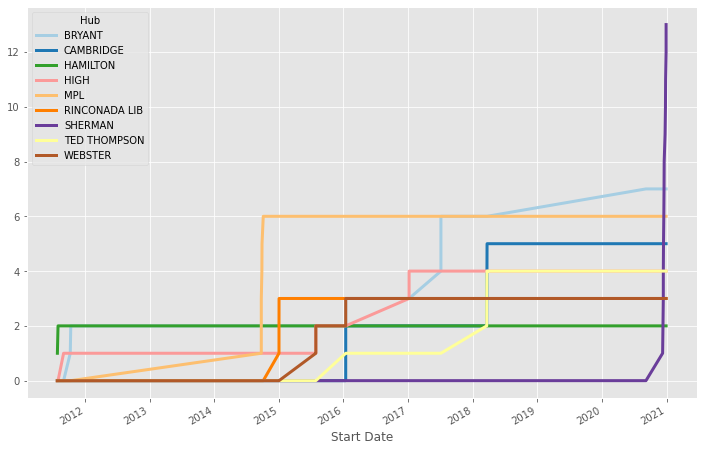

In [156]:
df_stations.plot(figsize=(12, 8), colormap = 'Paired', linewidth = 3)